###  Revision History
19-Feb-2019    1.0    Lou Pendley    Submitting to Thinkful for Prep Course for Data Science Bootcamp

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
%matplotlib inline

In [20]:
# Let's read in the data set
df = pd.read_csv('CityBikesProject3.csv.gz', compression='gzip', header=0, sep=',', quotechar='"')
df['age'] = 2018 - df['birth year'] # We are calculation the age of the rider
df['distance'] = df['distance'].astype(int) # Want to do a count on the integer miles ridden
df['speed'] = df['distance']/(df['tripduration']/3600)

In [21]:
def CalculateDistanceFromLatLon(dataframe, startlatitude, startlongitude, endlatitude, endlongitude):
    '''
    This function takes your pandas data frame, and adds another column, derived from a
    start longitude and latitude, and end longitude and latitude.
    It then returns the enhanced data frame.
    '''
    
    dataframe['distance'] = [geodesic(x,y).miles for x,y in zip(zip(startlatitude,startlongitude),
                                                                zip(endlatitude,endlongitude)
                                                               )
                            ]
    return dataframe

In [22]:
# Let's calculte the distance not in production, but before going to production.  This operation takes
# about 100% of the CPU for 3-5 minutes on my Mac.
recalculate = 0
if recalculate == 1:
    df = CalculateDistanceFromLatLon(df, df['start station latitude'], df['start station longitude'], 
                                         df['end station latitude'],   df['end station longitude'])

In [23]:
# Let's calculate the speed
# recalculate = 0
# if recalculate == 1:
#     df['speed'] = df['distance']/(df['tripduration']/3600)

In [24]:
# We only want to run this if we want to add more derived columns
# and to update the csv.gz file.

update_csv_gz = 0

if update_csv_gz == 1:
    print("we are going to add some calculated columns")
    df['starttime'] = pd.to_datetime(df['starttime'])
    df['stoptime'] =  pd.to_datetime(df['stoptime'])
    df_station_id = df.groupby('start station id').sum()
    df.to_csv('CityBikesProject3.csv.gz', compression='gzip')
    print("We just updated the file ")
else:
    print("Updating the csv.gz file skipped")

Updating the csv.gz file skipped


![title](CityBikesNYCRidingPicture.png)

#  <font color='blue'>Citi Bikes NYC Data Analysis</font>

  We will be working with the Citi Bike data from the largest bike share program in the United States.  This dataset includes the rental information for all bike share information for New York City, including Manhattan, Brooklyn, Queens, and Jersey City.  This program encompasses 13,046 bikes, and 763 stations.  

The data presented here is from the calendar year 2018, all 12 months.  The dataset includes 1 table which came from 12 months of csv files that were appended together. There are 1,016,505 rows in the current dataset.

The bike share dataset includes: Trip Duration in seconds, Start Timestamp, Stop Timestamp, Start Station Name, End Station Name, Station ID, Station Latitude/Longitude, Bike ID, User Type (Customers/Subscribers), Gender, and Year of Birth.

From this dataset, we can derive 2 tables:  Rider information, and Station information.  Selecting the distinct Station ID's, and taking the Station names, we have the second table, which could be valuable in future analysis.

Some of the data was filtered, the NYDOT removed any rides that were less than 60 seconds, which could have been false starts.

There are some further restrictions on the rider behavior.  Trips over two hours max out at 14.9 miles.

Unfortunately, we don't have the UserIds for the bike data.  Having this would have been of great help to determine if they were a commuter, taking the same route to work, say daily, Monday through Friday, at the same time going and coming home from work.

The oldest rider to rent a bike was born in 1885, which could be a data entry outlier.  They would have been 133 years old in 2018.  The youngest rider was 16.

The challenges that I encountered with the data was the rides are geared, forgive the pun, for 30 minute rides, and if the rider goes over, they are charged additionally.  This is for all bike rental plans too.  So if you wanted to do a tour of New York City, you would have to plan all of your rides to be within 30 minutes of riding for each leg, to pick up another bike.  This lends itself to short 30 minute rides, and short distances.

#  <font color='green'>Analytic Questions</font>

##   1.  What are the most popular routes that riders take in NYC?

In [25]:
# Station ID groupings
grouping_columns = ['start station name', 'end station name']
sort_by_aggregate = ['count']

# We will want to group by Station ID: start, and end
df_station_id=df.groupby(grouping_columns )['distance'].agg(['sum', 'count', 'mean']) 
df_station_id=df_station_id.sort_values(by=sort_by_aggregate, ascending=False) # thank you Roy!!!!

Are there popular paths that riders take, perhaps scenic, or commute routes?

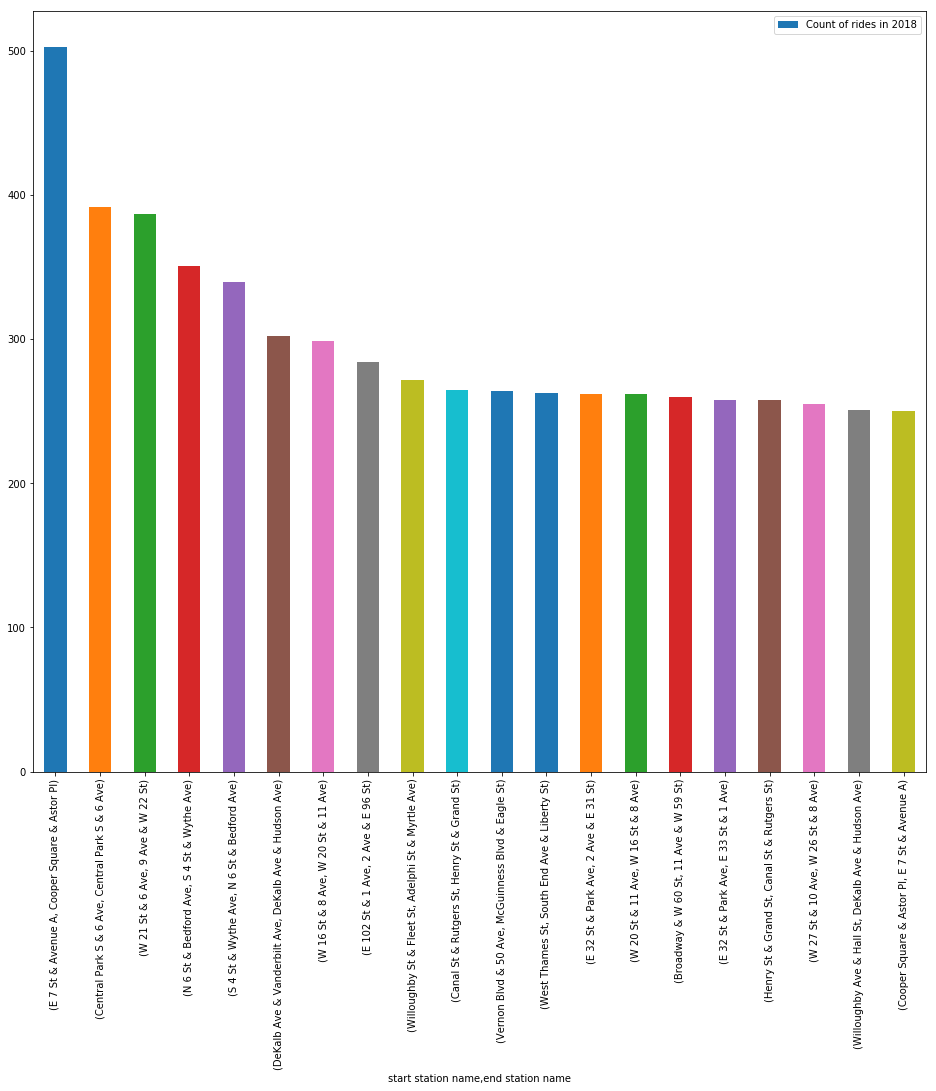

In [26]:
df_station_id.head(20).plot(y=sort_by_aggregate[0], kind='bar', label='Count of rides in 2018', figsize=(16,14));

This plot of routes shows us that the most popular route received approximately 500 riders in 2018.  There do not look to be any outliers.  The most popular rides look to be near Central Park and 5th and 6th Avenue.

##  <font color='purple'>2.  Who rides Citi Bikes in New York City?</font>

In [27]:
# All age groupings
grouping_columns = ['age']
sort_by_aggregate = ['count']

df_people_grouped = df.groupby(grouping_columns)[grouping_columns[0]].agg(sort_by_aggregate)
df_people_grouped = df_people_grouped.head(20).sort_values(by=sort_by_aggregate, ascending=False) 

###  2a.  Age demographics of program riders in NYC

What are most likely ages of people that ride Citi Bikes in NYC?  Is only young people that ride bikes?

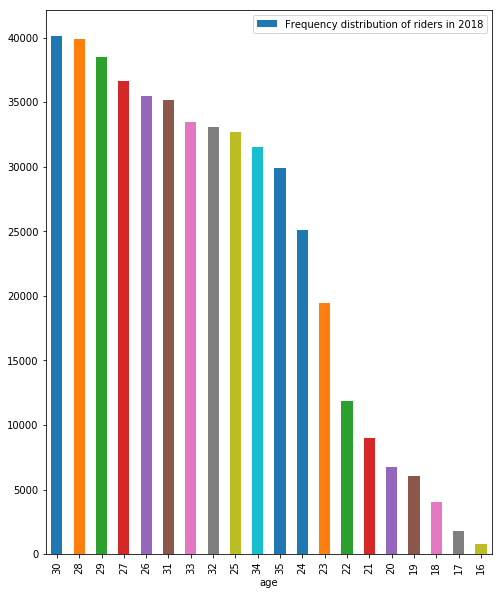

In [28]:
df_people_grouped.plot(y=sort_by_aggregate[0], kind='bar', label='Frequency distribution of riders in 2018', figsize=(8,10));

Let's ask ourselves this question:  How popular is riding Citi Bikes in NYC for people over 65?  Let's now filter down the age and see the results.

###  2b.  Do seniors participate in the program? 

Let's ask ourselves the question, do seniors, those 65 and older participate in this program?  Does anybody over 90 participate?  

In [29]:
# Over 65 age groupings
grouping_columns = ['age']
sort_by_aggregate = ['count']

df_over_65 = df[df['age'] >= 65]
df_over_65_grouped = df_over_65.groupby(grouping_columns)[grouping_columns[0]].agg(sort_by_aggregate)
df_over_65_grouped = df_over_65_grouped.head(30).sort_values(by=sort_by_aggregate, ascending=False) 

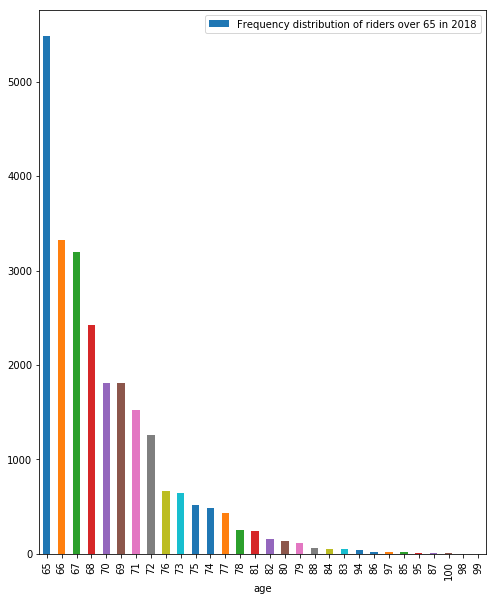

In [30]:
df_over_65_grouped.plot(y=sort_by_aggregate[0], kind='bar', label='Frequency distribution of riders over 65 in 2018', figsize=(8,10));

###  Answer:  Yes they do.  It is good to know that there are people over 90 taking rides in NYC, and that this program is attractive to them.  We even have somebody that is 100 years old riding still.

###  2c.  Question:  Is cycling as popular for men as it is for women in this program?  Does the helmet and their hair affect women riding in the program?

In [31]:
# Over 65 age groupings
grouping_columns = ['gender']
sort_by_aggregate = ['count']

df_gender = df.groupby(grouping_columns)[grouping_columns[0]].agg(sort_by_aggregate)
df_gender_grouped = df_gender.sort_values(by=sort_by_aggregate, ascending=False)

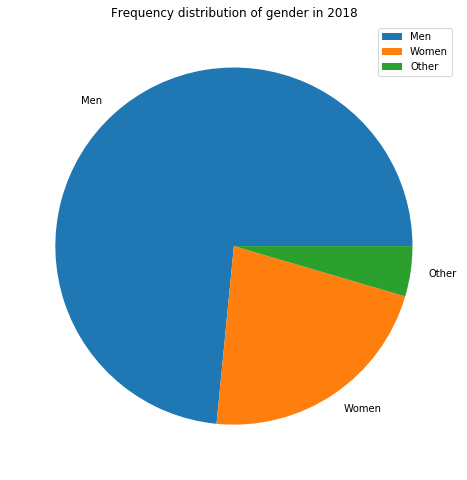

In [32]:
df_gender_grouped.plot(y=sort_by_aggregate[0], kind='pie', labels=['Men', 'Women', 'Other'], label='',title='Frequency distribution of gender in 2018', figsize=(8,10));

###  Answer:  It looks like in New York that men are the primary riders, and women are definitely the minority here.  Here again, it could be that the culture of riding a bike dressed up in the stylish Big Apple could discourage women from taking a spin.  Three-fourths of the riders are men.

###  2d.  How far do they ride on average?

In [33]:
# Distance groupings
grouping_columns = ['distance']
sort_by_aggregate = ['count']

df_distance = df
df_distance_grouped = df_distance.groupby(grouping_columns)[grouping_columns[0]].agg(sort_by_aggregate)
df_distance_grouped = df_distance_grouped.sort_values(by=sort_by_aggregate, ascending=False)

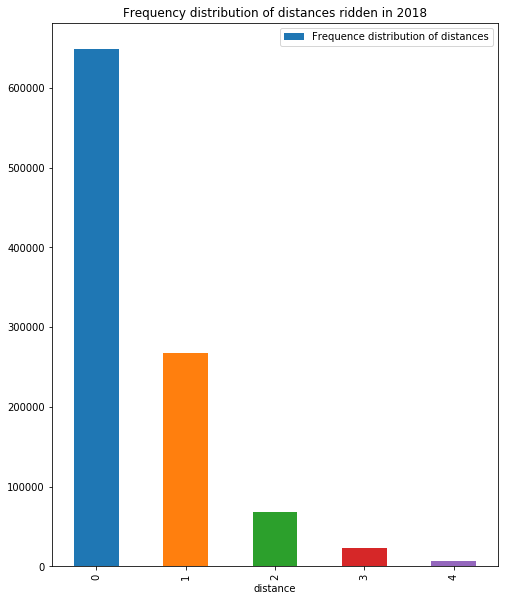

In [34]:
df_distance_grouped.head(5).plot(y=sort_by_aggregate[0], kind='bar', label='Frequence distribution of distances', title='Frequency distribution of distances ridden in 2018', figsize=(8,10));

###  Answer:  They do not ride very far with very few going over 3 miles.

In [35]:
# Customer types 
grouping_columns = ['usertype']
sort_by_aggregate = ['count']
df_usertype_grouped = df

df_usertype_grouped = df.groupby(grouping_columns)['usertype'].agg(['count'])
df_usertype_grouped = df_usertype_grouped.sort_values(by=sort_by_aggregate, ascending=False)

### 2e.  Are they primarily subscribers, or just infrequent riders?

[Text(0, 0, 'Subscriber'), Text(0, 0, 'Customer')]

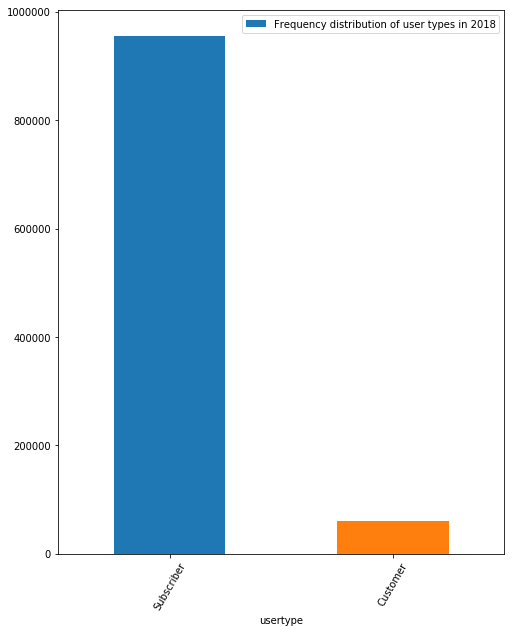

In [36]:
ax = df_usertype_grouped.plot(y=sort_by_aggregate[0], kind='bar', label='Frequency distribution of user types in 2018', figsize=(8,10));
ax.set_xticklabels(df_usertype_grouped.index, rotation=60)

###  From these numbers, it looks like this program is taken seriously by New Yorkers, logging close to 1,000,000 subscriber rides.  It looks to attract all age ranges, and men more than women.

##  Further Research
###  I propose that further research be done on week day commuter routes, leaving in the morning from a station, and returning to the same destination in the evening, suggesting that these riders are commuters.  If it can be determined that there are a significant number of these, then Citi Bikes could consider creating a Commuter class, to give special pricing for these riders, and helping to reduce the greenhouse gas footprint in our environment.

###  Another item for further research would be to map the most common routes taken, and to add GPS devices to the bikes, offering riders incentives to shop/dine near the  destination, after the ride.  The advertisement revenue could allow Citi Bikes to earn ad revenue to add more bikes to the networks, or create new stations in popular areas.

### Graphing the routes would be another nice feature to embellish this presentation.